In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math


In [111]:
wineData = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/winequalityN.csv")
wineData.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [112]:
wineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [113]:
wineData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [114]:
#Set a seed so that your results are reproduced identically each time you run this notebook
np.random.seed(370)
#We randomly shuffle the indices of the original data frame
shuffledIndices = np.random.permutation(list(range(0, len(wineData))))
train_ind = shuffledIndices[ : math.floor(0.75*len(wineData))]

test_ind = shuffledIndices[math.floor(0.75*len(wineData)) : math.floor(0.9*len(wineData))]
safe_ind = shuffledIndices[math.floor(0.9*len(wineData)) : ]

train = wineData.iloc[train_ind, ]
test = wineData.iloc[test_ind, ]
safe = wineData.iloc[safe_ind, ]

train.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1501,white,8.3,0.200,0.49,1.7,0.040,34.0,169.0,0.99380,3.05,0.37,10.1,5
1951,white,9.9,1.005,0.46,1.4,0.046,34.0,185.0,0.99660,3.02,0.49,10.2,4
3288,white,6.6,0.200,0.14,4.4,0.184,35.0,168.0,0.99396,2.93,0.45,9.4,6
6217,red,9.1,0.760,0.68,1.7,0.414,18.0,64.0,0.99652,2.90,1.33,9.1,6
5799,red,7.4,0.635,0.10,2.4,0.080,16.0,33.0,0.99736,3.58,0.69,10.8,7


First We will count the quality by using the countplot.


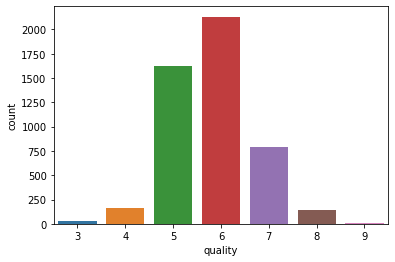

In [115]:
sns.countplot(x = "quality", data = train)

This Chart includes the Wine type vs quality count by using the bar graph.

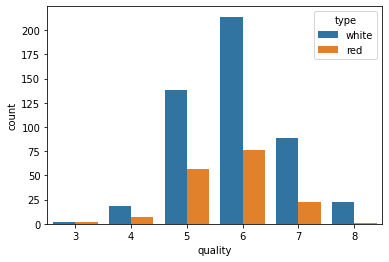

In [116]:
sns.countplot(x = "quality", hue = "type", data = safe)

 Highlighted the maximum and minimum values with colours.

In [117]:
#wineData.head()
#format_dict = {'wineData':'{:%m-%Y}'} #Simplified format dictionary with values that do make sense for our data
wineData.head(12).style.format(format_dict).highlight_max(color='pink').highlight_min(color='#33ACFF')


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,white,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
2,white,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
3,white,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
4,white,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
5,white,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
6,white,6.200000,0.320000,0.160000,7.000000,0.045000,30.000000,136.000000,0.994900,3.180000,0.470000,9.600000,6
7,white,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
8,white,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
9,white,8.100000,0.220000,0.430000,1.500000,0.044000,28.000000,129.000000,0.993800,3.220000,0.450000,11.000000,6


Displayed the colour gradiant's for highlights the data Value 

In [118]:
wineData.head().style.format(format_dict).background_gradient(subset=['total sulfur dioxide', 'free sulfur dioxide'], cmap='BuGn')


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,white,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
2,white,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
3,white,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
4,white,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6


The Similar Data Values displayed by the Bar Graph 



In [119]:
wineData.head().style.format(format_dict).bar(color='skyBlue', subset=['total sulfur dioxide', 'free sulfur dioxide'])


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,white,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
2,white,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
3,white,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
4,white,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6


Moreover, we also can combine the above functions and create a more complex visualization for easy understanding.


In [120]:
wineData.head().style.format(format_dict).background_gradient(subset=['total sulfur dioxide', 'free sulfur dioxide'], cmap='BuGn').highlight_max(color='pink')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,white,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
2,white,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
3,white,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
4,white,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6


We can show the plot line graph for comparison between type white and red vs chorides.

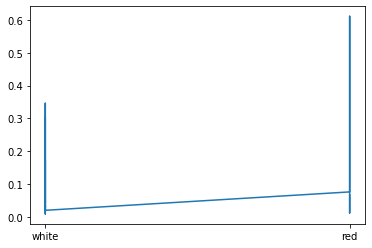

In [121]:
import matplotlib.pyplot as plt

plt.plot(wineData['type'], wineData['chlorides'], label='chlorides') 

Below graph shows the bar graph distinct plot for **Density** vs **Alcohol**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


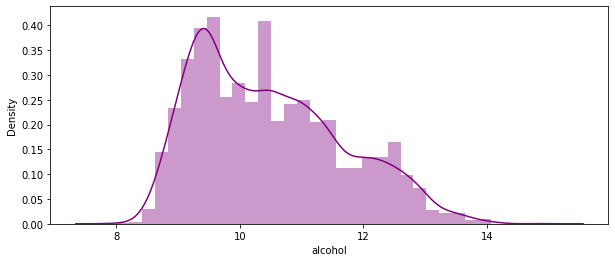

In [129]:
fig = plt.figure(figsize = (10, 4))
sns.distplot(["alcohol"], color = "purple")


This below scatter plot shows the relationship between the **Residual** sugar vs **Alcohol**.


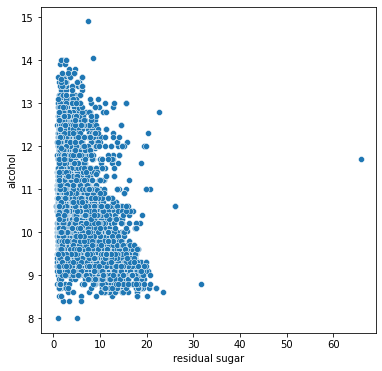

In [131]:
fig = plt.figure(figsize = (6, 6))
sns.scatterplot(x = "residual sugar", y = "alcohol", data = train)

Residual Sugar Vs Density by adding the type of the sugar, where the scatter plot can be in the readable form.

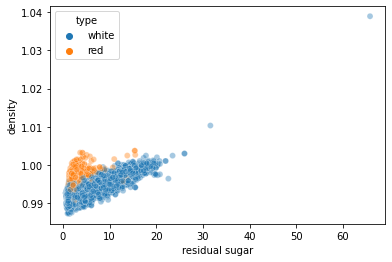

In [147]:
sns.scatterplot(x = "residual sugar", y = "density", hue = "type", data = train, alpha = 0.4)

This varius subtypes of line plot graphs shows the alcohol vs types and volatile acidity vs type.

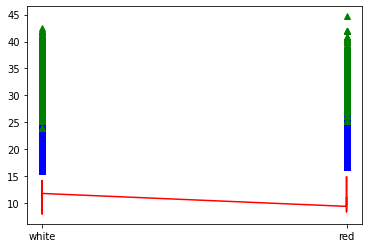

In [132]:
plt.plot(wineData['type'], wineData['alcohol'], 'r-')
plt.plot(wineData['type'], wineData['alcohol']*2, 'bs')
plt.plot(wineData['type'], wineData['alcohol']*3, 'g^')
